<a href="https://colab.research.google.com/github/Chetan-Godase/data-analysis-and-prediction-on-hotel-cancellation/blob/main/cancellation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import plotly.express as pe
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# display setup
pd.set_option("display.max_columns", None) # the None parameter displays unlimited columns
sns.set(style="whitegrid") # for plots

In [ ]:
# read the csv file
df = pd.read_csv(r"/content/drive/MyDrive/datasets/hotel_bookings.csv")

In [ ]:
# display the first 5 rows for a quick look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#check the shape of the data set
df.shape

(119390, 32)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#to check how many missing values each feature has
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#printing only the misssing values features
missing= df.isna().sum()
missing = missing[missing != 0]
print(missing)

children         4
country        488
agent        16340
company     112593
dtype: int64


In [ ]:
 #filling the missing values with 0 
 df.fillna(0,inplace=True)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df['is_canceled'].value_counts()/df.shape[0]*100

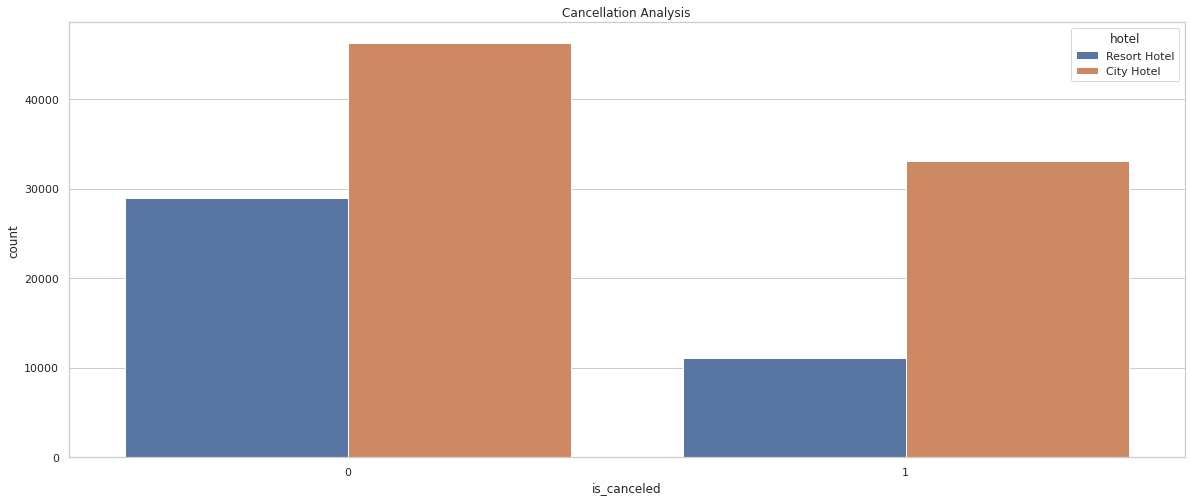

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='is_canceled', hue = 'hotel', data= df)
plt.title('Cancellation Analysis')
plt.show()

In [ ]:
#checking again for the missing values after cleaning
missing= df.isna().sum()
missing = missing[missing != 0]
if(missing.any() == 0):
  print("NO MISSING VALUES PRESENT IN THE DATASET") #prints the message if there are no missing values present
else:
  print(missing)

NO MISSING VALUES PRESENT IN THE DATASET


In [ ]:
#taking combinations
list=['adults','children','babies']
for i in list:
  print('{} has all these unique values {}'.format(i,df[i].unique()))    

adults has all these unique values [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has all these unique values [ 0.  1.  2. 10.  3.]
babies has all these unique values [ 0  1  2 10  9]


In [ ]:
#we can't have all three adults,children and babies 0 at a time that won't make sense and would be miss leading
#so  we filter the data
pd.set_option('display.max_columns',32) 
filter=(df['adults']==0) &(df['children']==0) & (df['babies']==0)
new_df= df[~filter]
new_df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#lets check country wise, which "N"country has "N" number of guests booking
new_df['country'].value_counts()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
CYM        1
PLW        1
PYF        1
VGB        1
BHS        1
Name: country, Length: 178, dtype: int64

In [ ]:
#Here we dont need the data where the booking are cancelled as they are our miss leading data,so we create filter
new_df[new_df['is_canceled']==0]['country'].value_counts()

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
NCL        1
PLW        1
BDI        1
KIR        1
NAM        1
Name: country, Length: 166, dtype: int64

In [ ]:
#visualizing the data in map to get a easy understanding
country_data= new_df[new_df['is_canceled']==0]['country'].value_counts().reset_index()
country_data.columns=['country','Guests']
folium.Map()
map_show= pe.choropleth(country_data,locations=country_data['country'],color=country_data['Guests'],
                       hover_name=country_data['country'],title='Guests from country')
map_show.show()

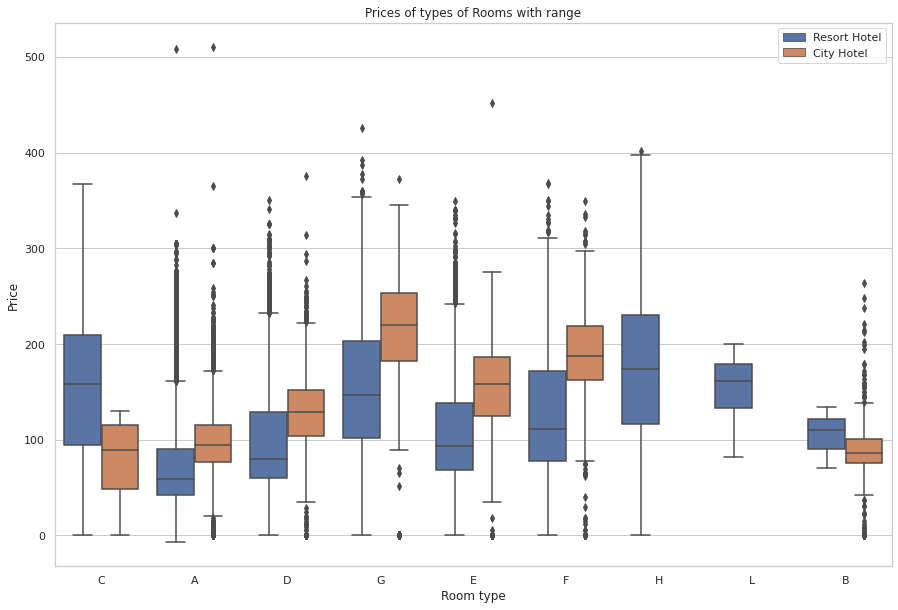

In [ ]:
#now to check if the data how much guests pay for the bookings each night
plt.figure(figsize=(15,10))
sns.boxplot(x='reserved_room_type', y='adr',hue='hotel',data=new_df[new_df['is_canceled']==0])
plt.title('Prices of types of Rooms with range')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#now lets check price  variation for both types of hotel
resort_data = new_df[(new_df["hotel"] == "Resort Hotel") & (new_df["is_canceled"] == 0)] #taking valid instances(valid bookings)
city_data = new_df[(new_df["hotel"] == "City Hotel") & (new_df["is_canceled"] == 0)]
#to group both are hotel type data and sorting it
resort_data=resort_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_data=city_data.groupby(['arrival_date_month'])['adr'].mean().reset_index()
#merging both data tables
grouped_hotels=resort_data.merge(city_data,on='arrival_date_month')
grouped_hotels.columns=['month','resort_prices','city_hotel_prices']
grouped_hotels

,month,resort_prices,city_hotel_prices
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sor

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-cp37-none-any.whl size=3437 sha256=ca2960814a216652d8e0d7d5c9b53216fb363d6b470f0cfc20da16789d1a4ac0
  Stored in directory: /root/.cache/pip/wheels/4c/35/02/083a8cdd13de15416e153a50324450c15189d259c861f9f964
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-cp37-none-any.whl size=3237 sha256=ad680ec94bd63677951f5af6d645b1da9d22032fe25e2f62a6e5bbde458234eb
  Stored in directory: /root/.cache/pip/wheels/11/2f/19/05e3f8e6a6d06a2e962f0a172bc9736451f6518e2db6d1ab6d
Successfully built sorted-months-weekdays


In [ ]:
#this is grouped data for resorts and hotel but its not sorted well, lets sort the data
sorted_ds=sor.Sort_Dataframeby_Month(grouped_hotels,'month')
sorted_ds


,month,resort_prices,city_hotel_prices
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


**There is our sorted data** 
---



In [ ]:
sorted_ds.columns

Index(['month', 'resort_prices', 'city_hotel_prices'], dtype='object')

In [ ]:
pe.line(sorted_ds,x='month',y='resort_prices',title="For resort prices as per months",hover_name=sorted_ds['month'])

In [ ]:
pe.line(sorted_ds,x='month',y='city_hotel_prices',title="For City Hotels prices as per months",hover_name=sorted_ds['month'])

 **Now we do correaltion on data to select the features**

In [ ]:
#finding corealtion with respect to is canceled feature(for our case)  
corelation=new_df.corr()['is_canceled']
print(corelation)
print("-------------------------------------------")
print("sorted values for the corelation")
#and then we sort it for easy visualization
print(corelation.abs().sort_values(ascending=False))

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64
-------------------------------------------
sorted values for the corelation
is_canceled                  

In [ ]:
#to get all the numeric features
numeric_not=['days_in_waiting_list','arrival_date_year']


cols=[]
for col in new_df.columns:
  if new_df[col].dtype!='O' and col not in numeric_not:
    cols.append(col)
numeric_feat = cols    
numeric_feat

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
#excluding features that has low corealtions
categorial_not=['arrival_date_year','assigned_room_type','booking_changes','reservation_status','country','days_in_waiting_list']

cols1=[]
for col in new_df.columns:
  if new_df[col].dtype=='O' and col not in categorial_not:
    cols1.append(col)
categorial_feat = cols1    
categorial_feat

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_data=new_df[categorial_feat]
cat_data.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [ ]:
#it was showing some warnings so i just ignored the warnings here
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#we want to pre process on reservation_status_date but for that we need to convert it appropriate format
cat_data['reservation_status_date'] = pd.to_datetime(cat_data['reservation_status_date'])
#making 3 new colums in the cat_data dataset
cat_data['year']=cat_data['reservation_status_date'].dt.year
cat_data['month']=cat_data['reservation_status_date'].dt.month
cat_data['day']=cat_data['reservation_status_date'].dt.day
#to drop unwanted data as we are already extracting it from reservation_status_date
cat_data.drop('reservation_status_date',axis=1,inplace=True)
cat_data

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,9,6
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017,9,7
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017,9,7
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017,9,7


In [ ]:
new_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
cat_data['cancelation']=new_df["is_canceled"] #appending is_canceled to categorical features
cat_data.head()


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancelation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


In [ ]:
#changing string data to numerical format for processing on it
#we use mean encoding for this
cat_data['market_segment'].unique() #to check unique values


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
#here since the cancelation is already in int format we dont need to include that 
cols2=cat_data.columns[0:8]
cols2

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [ ]:
#now we group all the features with respect to cancelation
for col in cols2:
  print(cat_data.groupby([col])['cancelation'].mean())
  print("-------------------------------")

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancelation, dtype: float64
-------------------------------
arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancelation, dtype: float64
-------------------------------
meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancelation, dtype: float64
-------------------------------
market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancelation, dtype: float64
-------------------------------
distribution_channel
Corporate    0.220568
Direct       0.1

In [ ]:
#now we just have to substitute the mean values istead of the strings in complete cat_data dataset
for col in cols2:
  print(cat_data.groupby([col])['cancelation'].mean().to_dict()) #here we use dictionary so that we can use it key:value pairing feature to susbstitute
  print("--------------------------------------------------------------------------------------------------------- \n")


{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}
--------------------------------------------------------------------------------------------------------- 

{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}
--------------------------------------------------------------------------------------------------------- 

{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}
--------------------------------------------------------------------------------------------------------- 

{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.187618326

In [ ]:
#now we just have to substitute the mean values istead of the strings in complete cat_data dataset
for col in cols2:
  dict=cat_data.groupby([col])['cancelation'].mean().to_dict() #here we use dictionary so that we can use it key:value pairing feature to susbstitute
  cat_data[col]=cat_data[col].map(dict)
cat_data.head()    

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancelation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [ ]:
#now we append all the categorial features and numerical features together again
whole_df = pd.concat([cat_data,new_df[numeric_feat]],axis=1)
whole_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancelation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [ ]:
#here if we notice there are 2 cancelation as we added one in cat_data for processing
#so we drop that from the whole_df
whole_df.drop('cancelation',axis=1,inplace=True)
whole_df

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.343313,0.410598,0.391567,0.28402,0.407864,2017,9,6,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0.417859,0.377823,0.374106,0.367590,0.410598,0.292683,0.28402,0.407864,2017,9,7,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0.417859,0.377823,0.374106,0.367590,0.410598,0.318108,0.28402,0.407864,2017,9,7,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0.417859,0.377823,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2017,9,7,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0


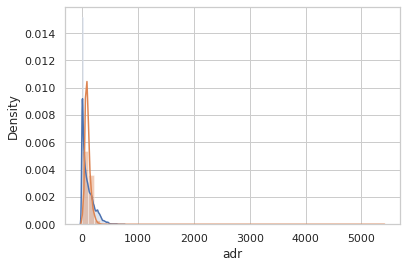

In [ ]:
sns.distplot(whole_df['lead_time'])
sns.distplot(whole_df['adr'])

In [ ]:
#AS WE SAW IN ABOVE GRAPHS, THERE ARE SOME OUTLIERS IN THE DATASET WHICH NEEDS TO BE HANDLES
#CREATING A FUNTION FOR HANDLING OUTLIERS
def outlier_handling (col):
  whole_df[col]=np.log1p(whole_df[col])

outlier_handling('lead_time')
outlier_handling('adr')

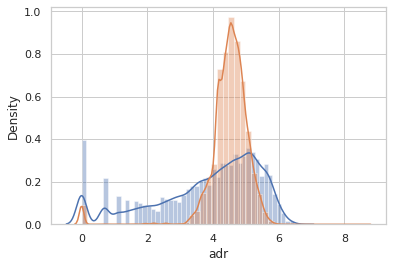

In [ ]:
sns.distplot(whole_df['lead_time'])
sns.distplot(whole_df['adr'].dropna())

In [ ]:
#FEATURE SELECTION
whole_df.dropna(inplace=True)

In [ ]:
x=whole_df.drop('is_canceled',axis=1)
y=whole_df['is_canceled']

features_considered=SelectFromModel(Lasso(alpha=0.006,random_state=0))
features_considered.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.006, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
#now lets see which features exactly helps to build a good model
features_considered.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True])

In [ ]:
cols=x.columns
select_features=cols[features_considered.get_support()]
print('All Features in total {}'.format(x.shape[1]))
print('\nImportant Features are:-\n')
print(select_features)

All Features in total 28

Important Features are:-

Index(['deposit_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'agent', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')


In [ ]:
x=x[select_features]
x

,deposit_type,year,month,day,lead_time,arrival_date_week_number,adults,children,previous_cancellations,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.28402,2015,7,1,5.837730,27,2,0.0,0,3,0.0,0.0,0.000000,0,0
1,0.28402,2015,7,1,6.603944,27,2,0.0,0,4,0.0,0.0,0.000000,0,0
2,0.28402,2015,7,2,2.079442,27,1,0.0,0,0,0.0,0.0,4.330733,0,0
3,0.28402,2015,7,2,2.639057,27,1,0.0,0,0,304.0,0.0,4.330733,0,0
4,0.28402,2015,7,3,2.708050,27,2,0.0,0,0,240.0,0.0,4.595120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.28402,2017,9,6,3.178054,35,2,0.0,0,0,394.0,0.0,4.576153,0,0
119386,0.28402,2017,9,7,4.634729,35,3,0.0,0,0,9.0,0.0,5.422436,0,2
119387,0.28402,2017,9,7,3.555348,35,2,0.0,0,0,9.0,0.0,5.067079,0,4
119388,0.28402,2017,9,7,4.700480,35,2,0.0,0,0,89.0,0.0,4.657763,0,0


In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_predict=lr.predict(x_test)
#now lets see our confusion matrix and its accuracy
print(confusion_matrix(y_test,lr_predict))
print('Accuracy is :- {}'.format(accuracy_score(y_test,lr_predict)))

[[13487  1590]
 [ 4889  3876]]
Accuracy is :- 0.7282526633671672


In [ ]:
#to get a accurate value we can cross validate our model and take its  mean to get a good example rather than getting random parts from dataset
lr_cr_score =  LogisticRegressionCV(cv=5, random_state=0).fit(x_train, y_train)
print(lr_cr_score.score(x_train,y_train))

0.7982425786697704


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
classifing_models=[]
classifing_models.append(('LogisticRegression',LogisticRegression()))
classifing_models.append(('Naive Bayes',GaussianNB()))
classifing_models.append(('RandomForest',RandomForestClassifier()))
classifing_models.append(('Decision Tree',DecisionTreeClassifier()))
classifing_models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))

In [ ]:
for algo, clsify_model in classifing_models:
    print(algo)
    RandomForestClassifier.fit(x_train, y_train)

    predict_all = RandomForestClassifier.predict(x_test)

    print("The confusion Matrix is:-")
    print(confusion_matrix(predict_all, y_test))
    print("The accuracy is :-")
    print(accuracy_score(predict_all,y_test))
    print("------------------------\n")

LogisticRegression
The confusion Matrix is:-
[[13487  4889]
 [ 1590  3876]]
The accuracy is :-
0.7282526633671672
------------------------

Naive Bayes
The confusion Matrix is:-
[[8279 1489]
 [6798 7276]]
The accuracy is :-
0.6524200989849844
------------------------

RandomForest
The confusion Matrix is:-
[[14953  1009]
 [  124  7756]]
The accuracy is :-
0.9524788188910326
------------------------

Decision Tree
The confusion Matrix is:-
[[14320   677]
 [  757  8088]]
The accuracy is :-
0.9398540390906803
------------------------

KNN
The confusion Matrix is:-
[[14806  1401]
 [  271  7364]]
The accuracy is :-
0.9298716550624948
------------------------

